<a href="https://colab.research.google.com/github/RRM2021/USAID-MODELS/blob/main/TOC_OIR_CAUCA_WITH_AUTOENCODER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGIONAL INTEGRATION STRATEGY RIS - USAID

ANALYTICAL MODEL FOR A THEORY OF CHANGE AND REGIONAL INTEGRATION OPPORTUNITIES OIR - CAUCA

RICARDO RAMÍREZ - ENGINEER DATA SCIENTIST - RIS ADVISOR

ETL EXTRACT, TRANSFORM, LOAD

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Replace 'your-link' with the actual URL of your Google Sheets document
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lBaPfPtkoQ8sIBc3Sma7yYtozaOldCmKuwex_xGXVeQ/edit?usp=drive_link')

# Specify the sheet name (e.g., 'data available')
sheets = gsheets.worksheet('DATOS2').get_all_values()

# Import pandas before using it
import pandas as pd

# Set the display option to show all columns
pd.set_option('display.max_columns', None)
# Create a Pandas DataFrame from the retrieved data
import pandas as pd
df = pd.DataFrame(sheets[1:], columns=sheets[0])
df

ACTIVIDADES_USAID GUAPI ARGELIA EL_TAMBO LOPEZ_DE_MICAY  \
0       NUESTRA TIERRA PRÓSPERA     0       0        0              0   
1      FINANZAS PARA LA EQUIDAD     1       1        1              1   
2            DESTINO NATURALEZA     1       0        0              0   
3                           SET     1       1        1              0   
4            JUSTICIA INCLUSIVA     1       0        1              0   
5               JUNTANZA ÉTNICA     1       0        0              0   
6                           WLH     0       0        0              0   
7               SOMOS COMUNIDAD     0       0        1              0   
8   JUNTOS POR LA TRANSPARENCIA     0       0        0              0   
9           JOVENES RESILIENTES     0       0        0              0   
10                   INSPIRAPAZ     0       0        0              0   
11            GENERANDO EQUIDAD     1       0        1              1   

   SANTANDER_DE_QUILICHAO BALBOA BUENOS AIRES CAJIBIO CALDONO CALOTO CORINTO  \
0                       1      0            1       0       1      1       1   
1                       1      1            1       1       1      1       1   
2                       0      0            0       0       0      0       0   
3                       1      0            1       1       0      0       0   
4                       1      0            0       0       1      1       1   
5                       1      0            1       0       0      0       1   
6                       1      0            1       1       0      0       0   
7                       1      0            0       0       1      1       0   
8                       1      0            0       0       0      1       1   
9                       1      0            0       0       0      1       1   
10                      1      0            1       0       1      1       1   
11                      1      0            0       0       1      1       1   

   JAMBALO MERCADERES MIRANDA MORALES PATIA PIENDAMO PUERTO TEJADA SUAREZ  \
0        0          0       1       0     0        0             0      1   
1        1          1       1       1     1        1             0      1   
2        0          0       0       0     0        0             0      0   
3        0          0       0       1     0        0             0      1   
4        1          0       1       0     0        0             0      0   
5        1          0       0       0     0        0             1      0   
6        0          0       0       1     0        1             0      1   
7        1          0       0       0     0        0             0      0   
8        0          0       1       0     0        0             0      0   
9        1          0       0       0     0        0             0      0   
10       1          0       0       0     0        0             0      0   
11       1          0       1       0     0        0             0      0   

   TIMBIQUI TORIBIO GUACHENE PADILLA VILLARICA POPAYAN OP_SOÑAR CAUCA_PR_SOST  \
0         0       1        1       1         1       0        0             1   
1         0       1        1       1         1       1        0             1   
2         0       0        0       0         0       0        0             1   
3         1       0        0       0         0       0        1             1   
4         0       1        0       0         0       1        0             0   
5         1       0        0       0         0       0        1             1   
6         0       1        0       0         0       1        1             1   
7         0       0        0       0         0       0        0             0   
8         0       0        0       0         0       0        1             0   
9         0       0        0       0         0       0        0             0   
10        0       0        0       0         0       0        0             0   
11        1       1        0       0         0   

DATA TYPE IDENTIFICATION

In [ ]:
# Iterate over columns starting from index 1
for col in df.columns[1:]:
    # Use try-except block to handle conversion errors
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        # Print a message if conversion fails for a specific column
        print(f"Error converting column '{col}' to float")

# Print the DataFrame with updated data types
print(df.dtypes)



ACTIVIDADES_USAID          object
GUAPI                     float64
ARGELIA                   float64
EL_TAMBO                  float64
LOPEZ_DE_MICAY            float64
SANTANDER_DE_QUILICHAO    float64
BALBOA                    float64
BUENOS AIRES              float64
CAJIBIO                   float64
CALDONO                   float64
CALOTO                    float64
CORINTO                   float64
JAMBALO                   float64
MERCADERES                float64
MIRANDA                   float64
MORALES                   float64
PATIA                     float64
PIENDAMO                  float64
PUERTO TEJADA             float64
SUAREZ                    float64
TIMBIQUI                  float64
TORIBIO                   float64
GUACHENE                  float64
PADILLA                   float64
VILLARICA                 float64
POPAYAN                   float64
OP_SOÑAR                  float64
CAUCA_PR_SOST             float64
COMPETITIVIDAD            float64
BUEN_GOB      

EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

GUAPI    ARGELIA   EL_TAMBO  LOPEZ_DE_MICAY  \
count  12.000000  12.000000  12.000000       12.000000   
mean    0.500000   0.166667   0.416667        0.166667   
std     0.522233   0.389249   0.514929        0.389249   
min     0.000000   0.000000   0.000000        0.000000   
25%     0.000000   0.000000   0.000000        0.000000   
50%     0.500000   0.000000   0.000000        0.000000   
75%     1.000000   0.000000   1.000000        0.000000   
max     1.000000   1.000000   1.000000        1.000000   

       SANTANDER_DE_QUILICHAO     BALBOA  BUENOS AIRES    CAJIBIO    CALDONO  \
count               12.000000  12.000000     12.000000  12.000000  12.000000   
mean                 0.916667   0.083333      0.500000   0.250000   0.500000   
std                  0.288675   0.288675      0.522233   0.452267   0.522233   
min                  0.000000   0.000000      0.000000   0.000000   0.000000   
25%                  1.000000   0.000000      0.000000   0.000000   0.000000   
50%                  1.000000   0.000000      0.500000   0.000000   0.500000   
75%                  1.000000   0.000000      1.000000   0.250000   1.000000   
max                  1.000000   1.000000      1.000000   1.000000   1.000000   

          CALOTO    CORINTO    JAMBALO  MERCADERES    MIRANDA    MORALES  \
count  12.000000  12.000000  12.000000   12.000000  12.000000  12.000000   
mean    0.666667   0.666667   0.583333    0.083333   0.416667   0.250000   
std     0.492366   0.492366   0.514929    0.288675   0.514929   0.452267   
min     0.000000   0.000000   0.000000    0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000    0.000000   0.000000   0.000000   
50%     1.000000   1.000000   1.000000    0.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000    0.000000   1.000000   0.250000   
max     1.000000   1.000000   1.000000    1.000000   1.000000   1.000000   

           PATIA   PIENDAMO  PUERTO TEJADA     SUAREZ   TIMBIQUI    TORIBIO  \
count  12.000000  12.000000      12.000000  12.000000  12.000000  12.000000   
mean    0.083333   0.166667       0.083333   0.333333   0.250000   0.416667   
std     0.288675   0.389249       0.288675   0.492366   0.452267   0.514929   
min     0.000000   0.000000       0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000       0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000       0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000       0.000000   1.000000   0.250000   1.000000   
max     1.000000   1.000000       1.000000   1.000000   1.000000   1.000000   

        GUACHENE    PADILLA  VILLARICA    POPAYAN   OP_SOÑAR  CAUCA_PR_SOST  \
count  12.000000  12.000000  12.000000  12.000000  12.000000      12.000000   
mean    0.166667   0.166667   0.166667   0.250000   0.333333       0.583333   
std     0.389249   0.389249   0.389249   0.452267   0.492366       0.514929   
min     0.000000   0.000000   0.000000   0.000000   0.000000       0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000       0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000       1.000000   
75%     0.000000   0.000000   0.000000   0.250000   1.000000       1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000       1.000000   

       COMPETITIVIDAD   BUEN_GOB  JUNTANZA_P_VIDA     IR_1_1     IR_1_2  \
count       12.000000  12.000000        12.000000  12.000000  12.000000   
mean         0.333333   0.333333         0.583333   0.250000   0.250000   
std          0.492366   0.492366         0.514929   0.452267   0.452267   
min          0.000000   0.000000         0.000000   0.000000   0.000000   
25%          0.000000   0.000000         0.000000   0.000000   0.000000   
50%          0.000000   0.000000         1.000000   0.000000   0.000000   
75%          1.000000   1.000000         1.000000   0.250000   0.250000   
max          1.000000   1.000000         1.000000   1.0000

In [ ]:
# Use Pandas Styler to render HTML with color formatting (for Jupyter Notebooks)
df.describe().style.background_gradient(cmap='coolwarm').format(precision=2)

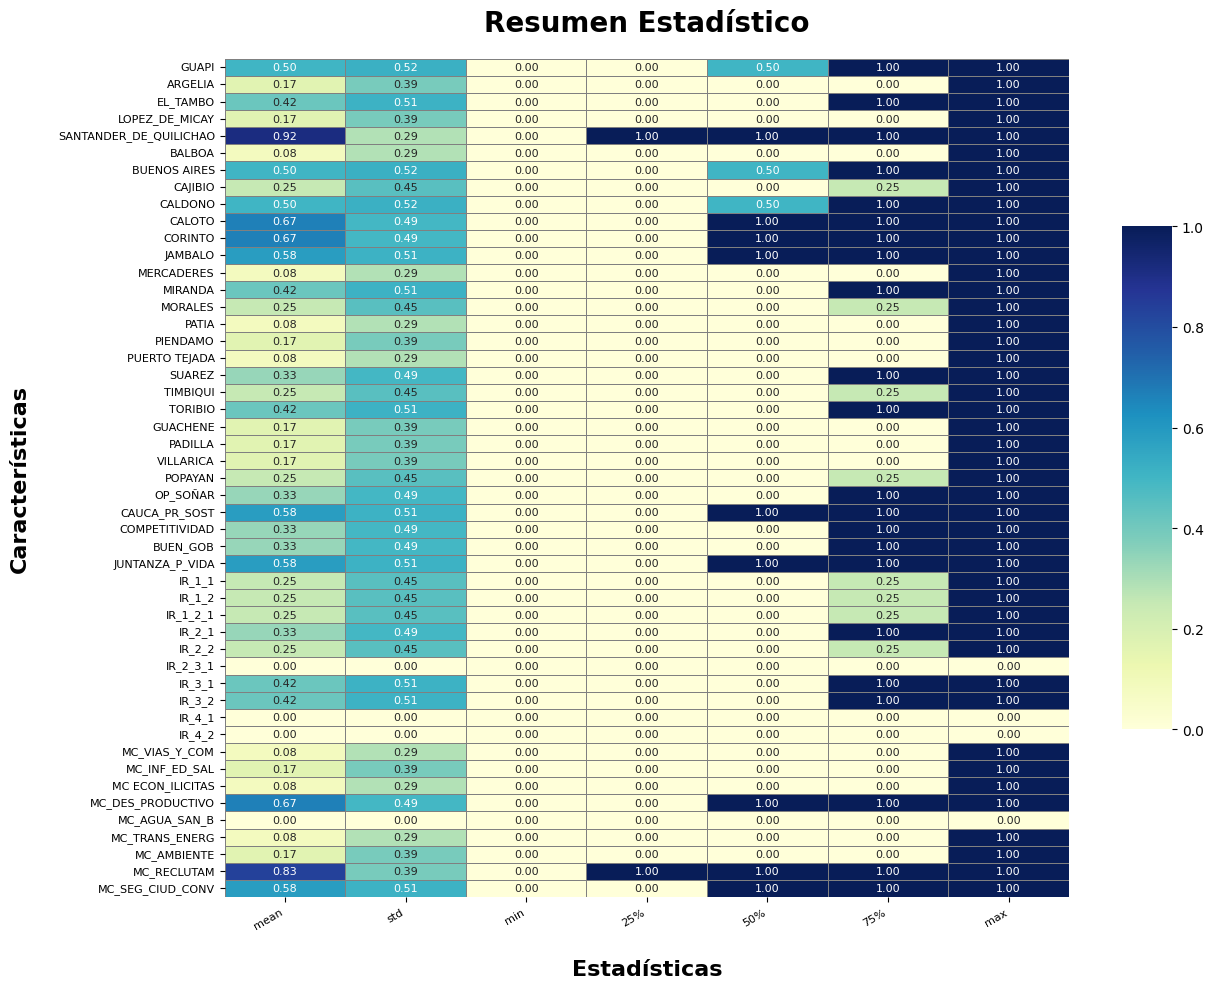

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las estadísticas resumen
summary_stats = df.describe()

# Crear una copia de las estadísticas resumen y eliminar la columna 'count'
summary_stats_no_count = summary_stats.drop('count', axis=0)

# Crear un heatmap
plt.figure(figsize=(13, 10))  # Aumentar el tamaño de la figura

# Usar sns.heatmap con más personalización
sns.heatmap(
    summary_stats_no_count.T,  # Usar el DataFrame sin 'count'
    annot=True,
    cmap='YlGnBu',      # Cambiar el mapa de colores a 'YlGnBu' para un mejor contraste
    fmt=".2f",          # Mantener dos decimales en las anotaciones
    linewidths=0.5,     # Añadir líneas delgadas entre las celdas
    linecolor='gray',   # Establecer el color de las líneas entre celdas
    cbar_kws={'shrink': 0.6, 'aspect': 10},  # Ajustar el tamaño y forma de la barra de color
    annot_kws={"size": 8},  # Ajustar el tamaño de la fuente de las anotaciones
    square=False        # Dejar que las celdas sean rectangulares para espaciar mejor
)

# Personalizar título y etiquetas
plt.title('Resumen Estadístico', fontsize=20, weight='bold', pad=20)
plt.xticks(fontsize=8, rotation=30, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.yticks(fontsize=8, rotation=0)  # Mantener las etiquetas del eje y horizontales
plt.xlabel("Estadísticas", fontsize=16, weight='bold', labelpad=20)
plt.ylabel("Características", fontsize=16, weight='bold', labelpad=20)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
import plotly.graph_objects as go

# Obtener estadísticas resumidas y redondear a un decimal
summary_stats = df.describe().round(1).reset_index()

# Crear una tabla en Plotly
fig = go.Figure(data=[go.Table(
    columnwidth=[150] * len(summary_stats.columns),  # Aumentar el ancho de las columnas
    header=dict(
        values=[f'<b>{col}</b>' for col in summary_stats.columns],  # Poner en negrita y permitir multilíneas
        fill_color='#1f77b4',
        align='center',
        font=dict(color='white', size=6, family="Arial"),
        height=40,  # Incrementar altura para caber texto multilínea
    ),
    cells=dict(
        values=[summary_stats[col] for col in summary_stats.columns],
        fill_color=[['#f2f2f2', '#e2e2e2'] * len(summary_stats)],  # Alternar colores en las filas
        align='center',
        font=dict(color='black', size=11, family="Arial"),
        height=25
    )
)])

# Personalizar el layout
fig.update_layout(
    title="Summary Statistics Table",
    title_font=dict(size=20, family='Arial Bold', color='black'),
    title_x=0.5,  # Centrar el título
    margin=dict(l=50, r=50, t=80, b=30),  # Margen para evitar que la tabla esté pegada al borde
    width=1800,  # Ancho total del gráfico ajustado
    height=450  # Altura total del gráfico
)

# Mostrar la tabla
fig.show()





DATA PREPARATION

In [ ]:
# Create a new DataFrame with columns from index 1 to the end
df2 = df.iloc[:, 1:]
df2.head(5)

GUAPI  ARGELIA  EL_TAMBO  LOPEZ_DE_MICAY  SANTANDER_DE_QUILICHAO  BALBOA  \
0    0.0      0.0       0.0             0.0                     1.0     0.0   
1    1.0      1.0       1.0             1.0                     1.0     1.0   
2    1.0      0.0       0.0             0.0                     0.0     0.0   
3    1.0      1.0       1.0             0.0                     1.0     0.0   
4    1.0      0.0       1.0             0.0                     1.0     0.0   

   BUENOS AIRES  CAJIBIO  CALDONO  CALOTO  CORINTO  JAMBALO  MERCADERES  \
0           1.0      0.0      1.0     1.0      1.0      0.0         0.0   
1           1.0      1.0      1.0     1.0      1.0      1.0         1.0   
2           0.0      0.0      0.0     0.0      0.0      0.0         0.0   
3           1.0      1.0      0.0     0.0      0.0      0.0         0.0   
4           0.0      0.0      1.0     1.0      1.0      1.0         0.0   

   MIRANDA  MORALES  PATIA  PIENDAMO  PUERTO TEJADA  SUAREZ  TIMBIQUI  \
0      1.0      0.0    0.0       0.0            0.0     1.0       0.0   
1      1.0      1.0    1.0       1.0            0.0     1.0       0.0   
2      0.0      0.0    0.0       0.0            0.0     0.0       0.0   
3      0.0      1.0    0.0       0.0            0.0     1.0       1.0   
4      1.0      0.0    0.0       0.0            0.0     0.0       0.0   

   TORIBIO  GUACHENE  PADILLA  VILLARICA  POPAYAN  OP_SOÑAR  CAUCA_PR_SOST  \
0      1.0       1.0      1.0        1.0      0.0       0.0            1.0   
1      1.0       1.0      1.0        1.0      1.0       0.0            1.0   
2      0.0       0.0      0.0        0.0      0.0       0.0            1.0   
3      0.0       0.0      0.0        0.0      0.0       1.0            1.0   
4      1.0       0.0      0.0        0.0      1.0       0.0            0.0   

   COMPETITIVIDAD  BUEN_GOB  JUNTANZA_P_VIDA  IR_1_1  IR_1_2  IR_1_2_1  \
0             1.0       0.0              0.0     0.0     0.0       0.0   
1             0.0       0.0              0.0     0.0     0.0       0.0   
2             0.0       0.0              0.0     0.0     0.0       0.0   
3             0.0       0.0              0.0     0.0     0.0       0.0   
4             0.0       0.0              1.0     0.0     0.0       0.0   

   IR_2_1  IR_2_2  IR_2_3_1  IR_3_1  IR_3_2  IR_4_1  IR_4_2  MC_VIAS_Y_COM  \
0     0.0     0.0       0.0     1.0     1.0     0.0     0.0            0.0   
1     0.0     0.0       0.0     1.0     1.0     0.0     0.0            0.0   
2     0.0     0.0       0.0     0.0     1.0     0.0     0.0            0.0   
3     0.0     0.0       0.0     1.0     1.0     0.0     0.0            1.0   
4     1.0     0.0       0.0     0.0     0.0     0.0     0.0            0.0   

   MC_INF_ED_SAL  MC ECON_ILICITAS  MC_DES_PRODUCTIVO  MC_AGUA_SAN_B  \
0            1.0               1.0                1.0            0.0   
1            0.0               0.0                1.0            0.0   
2            0.0               0.0                1.0            0.0   
3            0.0               0.0                1.0            0.0   
4            0.0               0.0                0.0            0.0   

   MC_TRANS_ENERG  MC_AMBIENTE  MC_RECLUTAM  MC_SEG_CIUD_CONV  
0             0.0          0.0          0.0               0.0  
1             1.0          0.0          1.0               0.0  
2             0.0          1.0          1.0               0.0  
3             0.0          0.0          1.0               0.0  
4             0.0          0.0          1.0               1.0

In [ ]:
X = df2.values
X

array([[0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0.],
       [1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 

DATA STANDARDIZATION

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
X_scaled

(12, 49)


array([[-1.        , -0.4472136 , -0.84515425, -0.4472136 ,  0.30151134,
        -0.30151134,  1.        , -0.57735027,  1.        ,  0.70710678,
         0.70710678, -1.18321596, -0.30151134,  1.18321596, -0.57735027,
        -0.30151134, -0.4472136 , -0.30151134,  1.41421356, -0.57735027,
         1.18321596,  2.23606798,  2.23606798,  2.23606798, -0.57735027,
        -0.70710678,  0.84515425,  1.41421356, -0.70710678, -1.18321596,
        -0.57735027, -0.57735027, -0.57735027, -0.70710678, -0.57735027,
         0.        ,  1.18321596,  1.18321596,  0.        ,  0.        ,
        -0.30151134,  2.23606798,  3.31662479,  0.70710678,  0.        ,
        -0.30151134, -0.4472136 , -2.23606798, -1.18321596],
       [ 1.        ,  2.23606798,  1.18321596,  2.23606798,  0.30151134,
         3.31662479,  1.        ,  1.73205081,  1.        ,  0.70710678,
         0.70710678,  0.84515425,  3.31662479,  1.18321596,  1.73205081,
         3.31662479,  2.23606798, -0.30151134,  1.41421356, -0.

DIMENSIONALITY REDUCTION AND NOISE REDUCTION THROUGH A NEURON NETWORK : AUTOENCODER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Build and train the autoencoder
input_dim = X_scaled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Extract encoded features
encoded_features = encoder.predict(X_scaled)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.1654
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.1564
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.1479
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.1393
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1305
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1209
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1101
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0979
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0844
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0695
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0535
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0362
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.0179
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9987
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9787
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
print(encoded_features.shape)

(12, 32)


CLUSTERIZATION BY MEANS OF K-Means MACHINE LEARNING

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [ ]:
k_means = KMeans()
# Set up the parameter grid to search over
param_grid = {"n_clusters": [2, 3, 4], "n_init": [4, 5], "max_iter": [5, 10, 15, 25], "algorithm": ["lloyd", "elkan"]}

# Set up the grid search
grid_search = GridSearchCV(k_means, param_grid=param_grid, cv=5)

# Run the grid search
grid_search.fit(encoded_features)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'elkan', 'max_iter': 15, 'n_clusters': 4, 'n_init': 4}
Best score: -367.03673095703124


TRAINING THE ANALYTICAL MODEL WITH THE DATA AND ASSIGNING LABELS TO EACH POINT IN THE DATASET

In [ ]:
from sklearn.cluster import KMeans

# Define the best parameters obtained from the grid search
best_params = grid_search.best_params_
#best_params = {'algorithm': 'full', 'max_iter': 5, 'n_clusters': 3, 'n_init': 5}
# Create a K-Means model with the best parameters
k_means = KMeans(**best_params)
clusters = k_means.fit_predict(encoded_features)

# Add the cluster labels to the original DataFrame
df2['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(encoded_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

df_caract = df2.groupby('Cluster').mean()
df_caract

Silhouette Score: 0.21805711090564728


GUAPI  ARGELIA  EL_TAMBO  LOPEZ_DE_MICAY  SANTANDER_DE_QUILICHAO  \
Cluster                                                                     
0          0.6      0.2       0.2             0.0                     0.8   
1          0.4      0.0       0.6             0.2                     1.0   
2          0.0      0.0       0.0             0.0                     1.0   
3          1.0      1.0       1.0             1.0                     1.0   

         BALBOA  BUENOS AIRES  CAJIBIO  CALDONO  CALOTO  CORINTO  JAMBALO  \
Cluster                                                                     
0           0.0           0.4      0.2      0.0     0.4      0.6      0.4   
1           0.0           0.4      0.2      0.8     0.8      0.6      0.8   
2           0.0           1.0      0.0      1.0     1.0      1.0      0.0   
3           1.0           1.0      1.0      1.0     1.0      1.0      1.0   

         MERCADERES  MIRANDA  MORALES  PATIA  PIENDAMO  PUERTO TEJADA  SUAREZ  \
Cluster                                                                         
0               0.0      0.2      0.2    0.0       0.0            0.2     0.2   
1               0.0      0.4      0.2    0.0       0.2            0.0     0.2   
2               0.0      1.0      0.0    0.0       0.0            0.0     1.0   
3               1.0      1.0      1.0    1.0       1.0            0.0     1.0   

         TIMBIQUI  TORIBIO  GUACHENE  PADILLA  VILLARICA  POPAYAN  OP_SOÑAR  \
Cluster                                                                       
0             0.4      0.0       0.0      0.0        0.0      0.0       0.6   
1             0.2      0.6       0.0      0.0        0.0      0.4       0.2   
2             0.0      1.0       1.0      1.0        1.0      0.0       0.0   
3             0.0      1.0       1.0      1.0        1.0      1.0       0.0   

         CAUCA_PR_SOST  COMPETITIVIDAD  BUEN_GOB  JUNTANZA_P_VIDA  IR_1_1  \
Cluster                                                                     
0                  0.6             0.2       0.6              0.4     0.0   
1                  0.4             0.4       0.2              1.0     0.6   
2                  1.0             1.0       0.0              0.0     0.0   
3                  1.0             0.0       0.0              0.0     0.0   

         IR_1_2  IR_1_2_1  IR_2_1  IR_2_2  IR_2_3_1  IR_3_1  IR_3_2  IR_4_1  \
Cluster                                                                       
0           0.0       0.0     0.0     0.4       0.0     0.4     0.4     0.0   
1           0.6       0.6     0.8     0.2       0.0     0.2     0.2     0.0   
2           0.0       0.0     0.0     0.0       0.0     1.0     1.0     0.0   
3           0.0       0.0     0.0     0.0       0.0     1.0     1.0     0.0   

         IR_4_2  MC_VIAS_Y_COM  MC_INF_ED_SAL  MC ECON_ILICITAS  \
Cluster                                                           
0           0.0            0.2            0.0               0.0   
1           0.0            0.0            0.2               0.0   
2           0.0            0.0            1.0               1.0   
3           0.0            0.0            0.0               0.0   

         MC_DES_PRODUCTIVO  MC_AGUA_SAN_B  MC_TRANS_ENERG  MC_AMBIENTE  \
Cluster                                                                  
0                      0.8            0.0             0.0          0.4   
1                      0.4            0.0             0.0          0.0   
2                      1.0            0.0             0.0          0.0   
3                      1.0            0.0             1.0          0.0   

         MC_RECLUTAM  MC_SEG_CIUD_CONV  
Cluster                                 
0                0.8               0.4  
1                1.0               1.0  
2                0.0               0.0  
3                1.0               0.0

VISUALIZATION OF CLUSTER CHARACTERIZATION

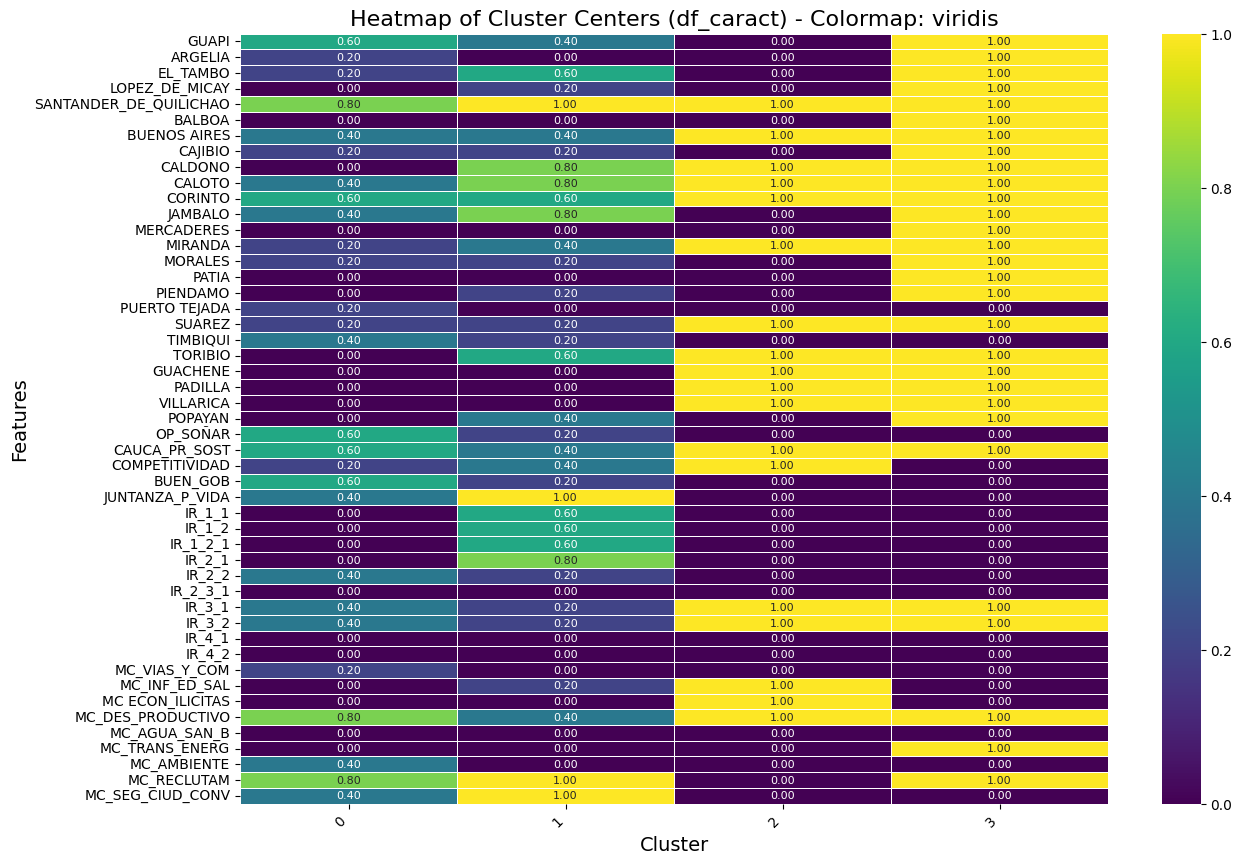

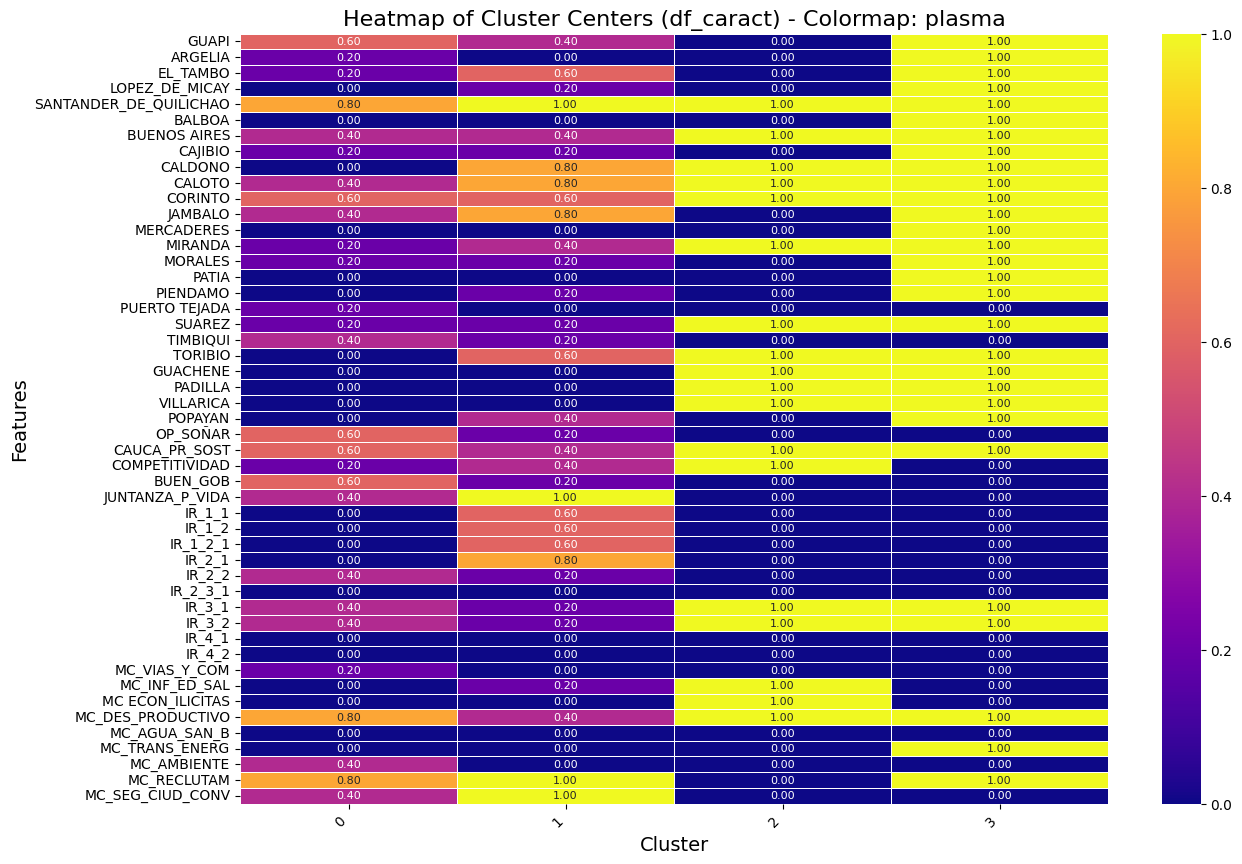

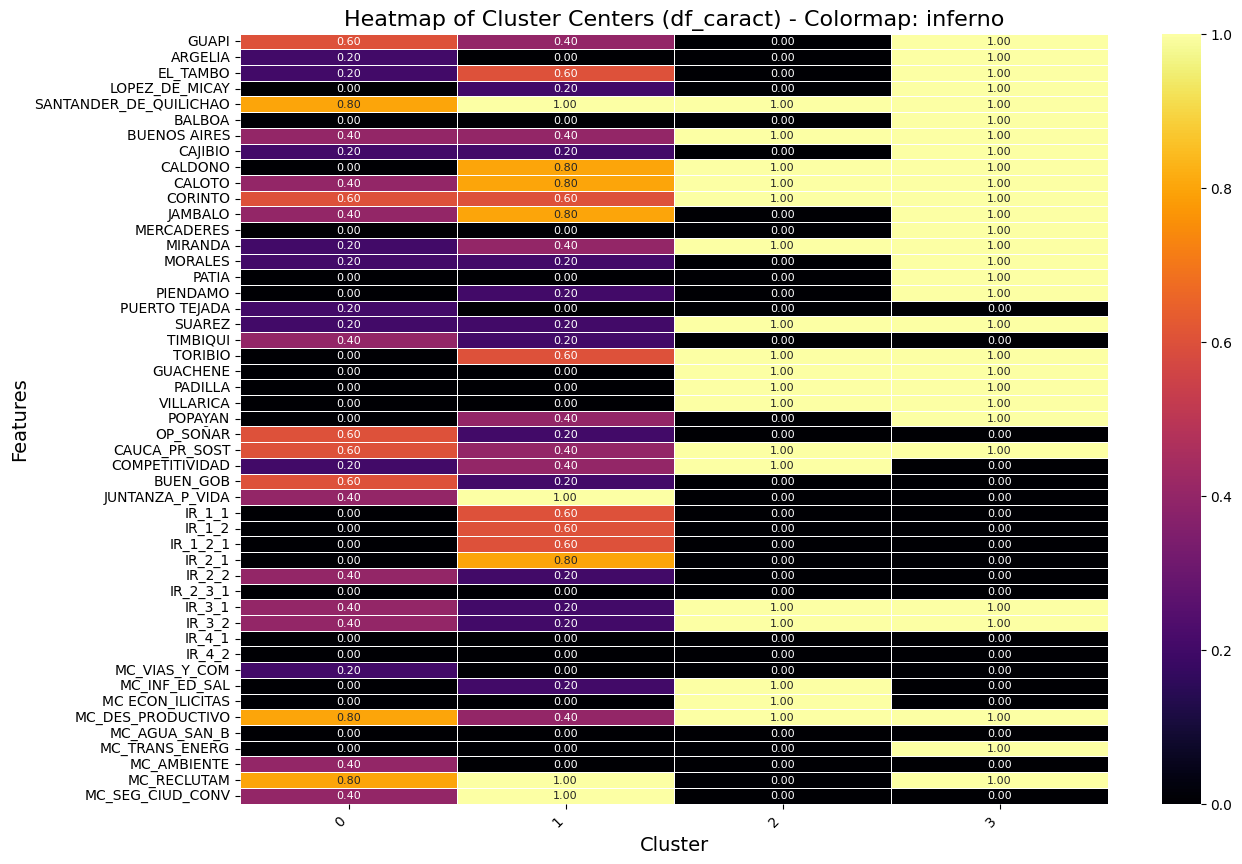

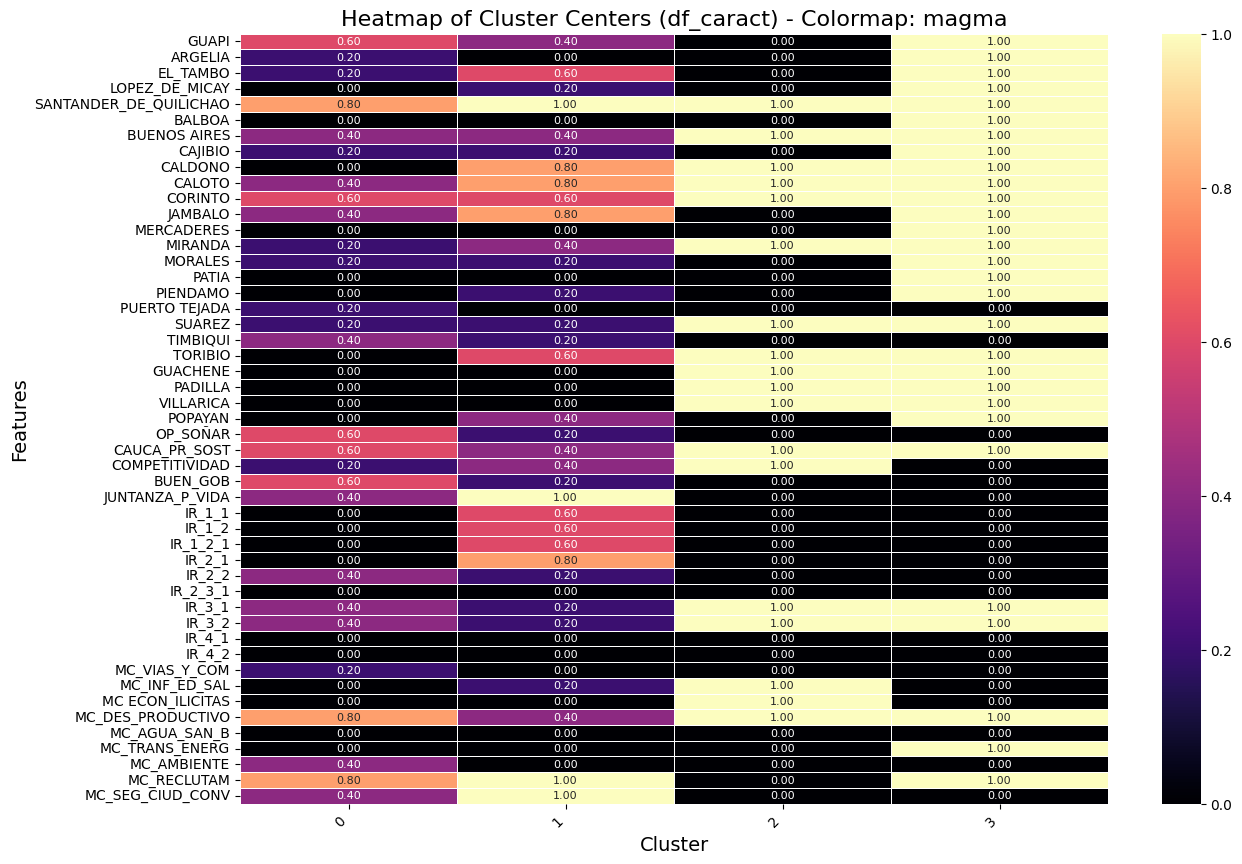

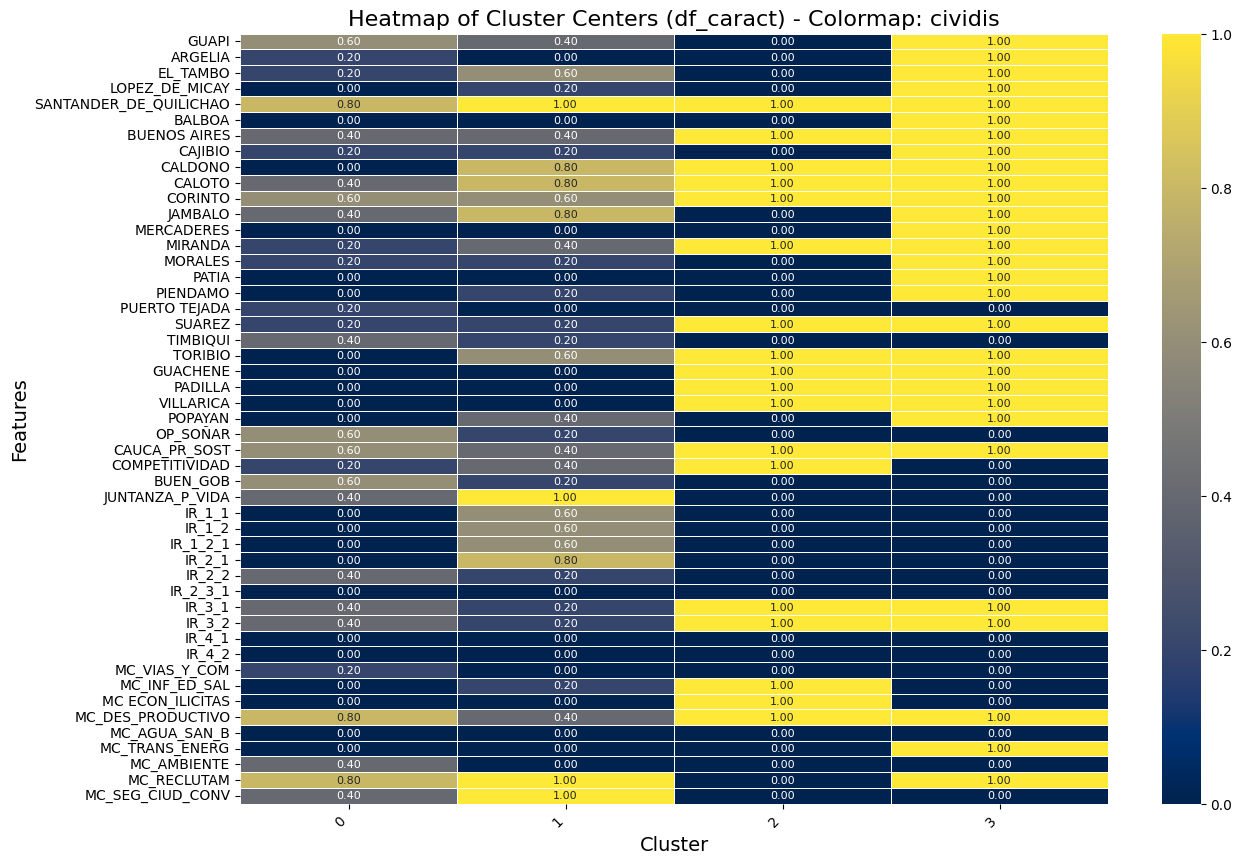

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of different colormaps you might want to explore
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

for cmap in color_maps:
    plt.figure(figsize=(14, 10))

    # Create the heatmap
    sns.heatmap(df_caract.T, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, annot_kws={"size": 8})

    plt.title(f"Heatmap of Cluster Centers (df_caract) - Colormap: {cmap}", fontsize=16)
    plt.xlabel("Cluster", fontsize=14)
    plt.ylabel("Features", fontsize=14)

    # Rotate the feature names for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()



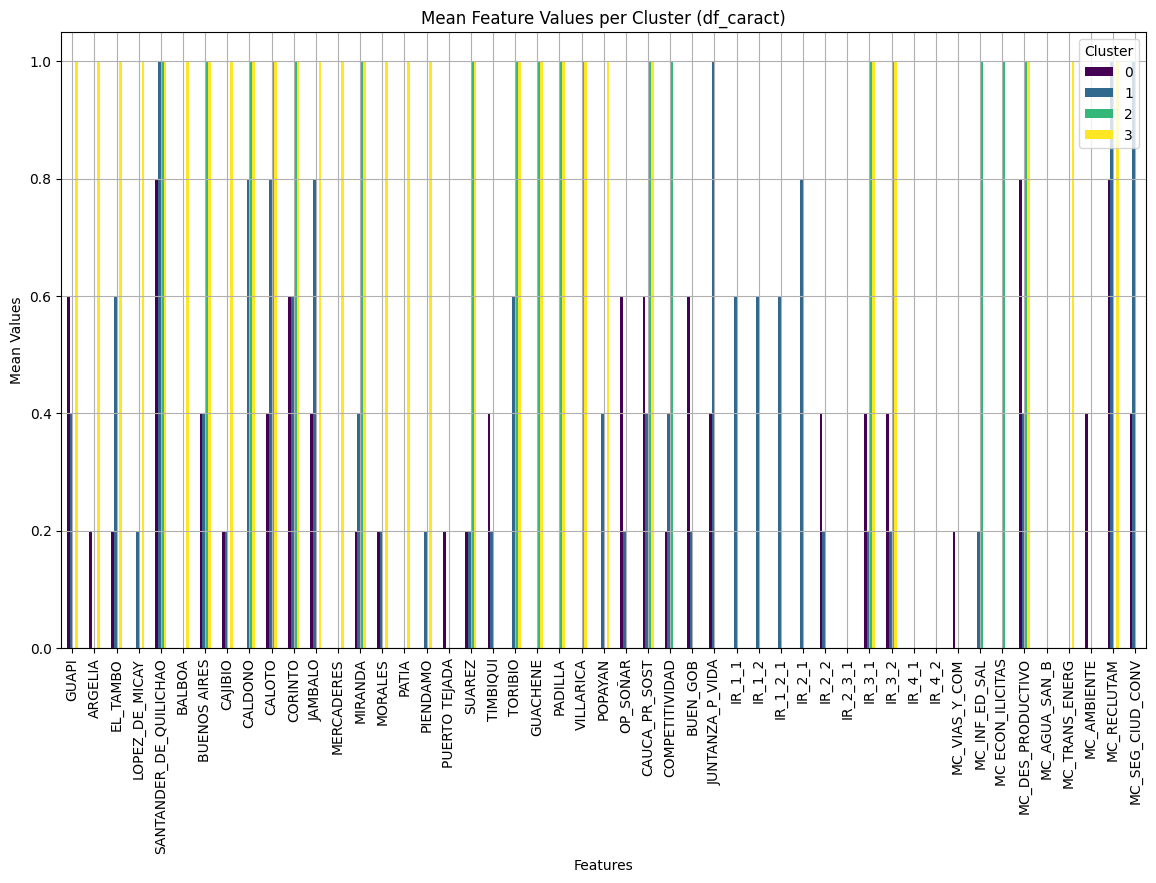

In [ ]:
import matplotlib.pyplot as plt

df_caract.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title("Mean Feature Values per Cluster (df_caract)")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
sns.pairplot(df2, hue='Cluster', palette='viridis')
plt.show()


IDENTIFICATION OF THE LABELS OF EACH CLUSTER ASSIGNED TO EACH USAID ACTIVITY

In [ ]:
# Assuming 'k_means' is a fitted KMeans object
labels = k_means.labels_

# Add the labels to the dataframe
df['Cluster'] = labels
df_labels = df.iloc[:, [0, -1]]
df_labels

ACTIVIDADES_USAID  Cluster
0       NUESTRA TIERRA PRÓSPERA        2
1      FINANZAS PARA LA EQUIDAD        3
2            DESTINO NATURALEZA        0
3                           SET        0
4            JUSTICIA INCLUSIVA        1
5               JUNTANZA ÉTNICA        0
6                           WLH        1
7               SOMOS COMUNIDAD        1
8   JUNTOS POR LA TRANSPARENCIA        0
9           JOVENES RESILIENTES        0
10                   INSPIRAPAZ        1
11            GENERANDO EQUIDAD        1

CHARACTERIZATION OF EACH CLUSTER, BASED ON THE AVERAGE VALUE OF EACH VARIABLE.

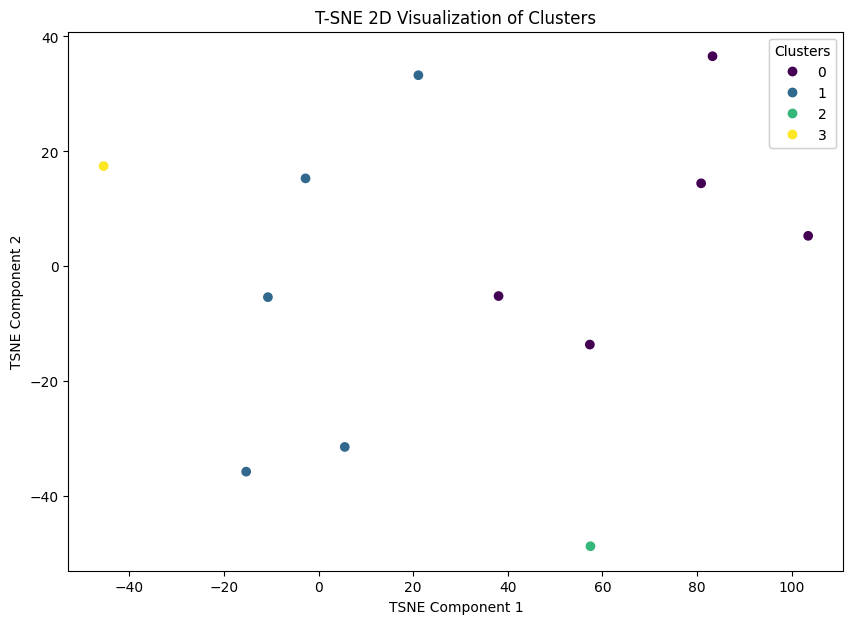

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Perform T-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_results = tsne.fit_transform(encoded_features)

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))

# Plot the T-SNE results in 2D
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis')

# Add labels
plt.title("T-SNE 2D Visualization of Clusters")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend)

# Show the plot
plt.show()


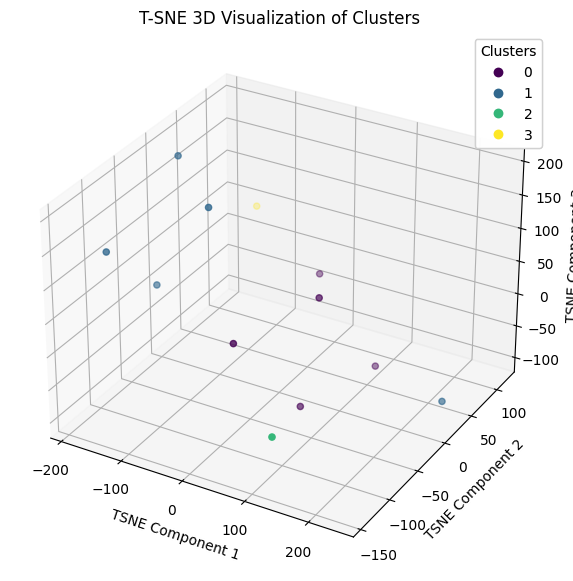

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Perform T-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
tsne_results = tsne.fit_transform(encoded_features)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the T-SNE results in 3D
scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=clusters, cmap='viridis')

# Add labels
ax.set_title("T-SNE 3D Visualization of Clusters")
ax.set_xlabel("TSNE Component 1")
ax.set_ylabel("TSNE Component 2")
ax.set_zlabel("TSNE Component 3")

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Show the plot
plt.show()


<Figure size 1000x700 with 0 Axes>

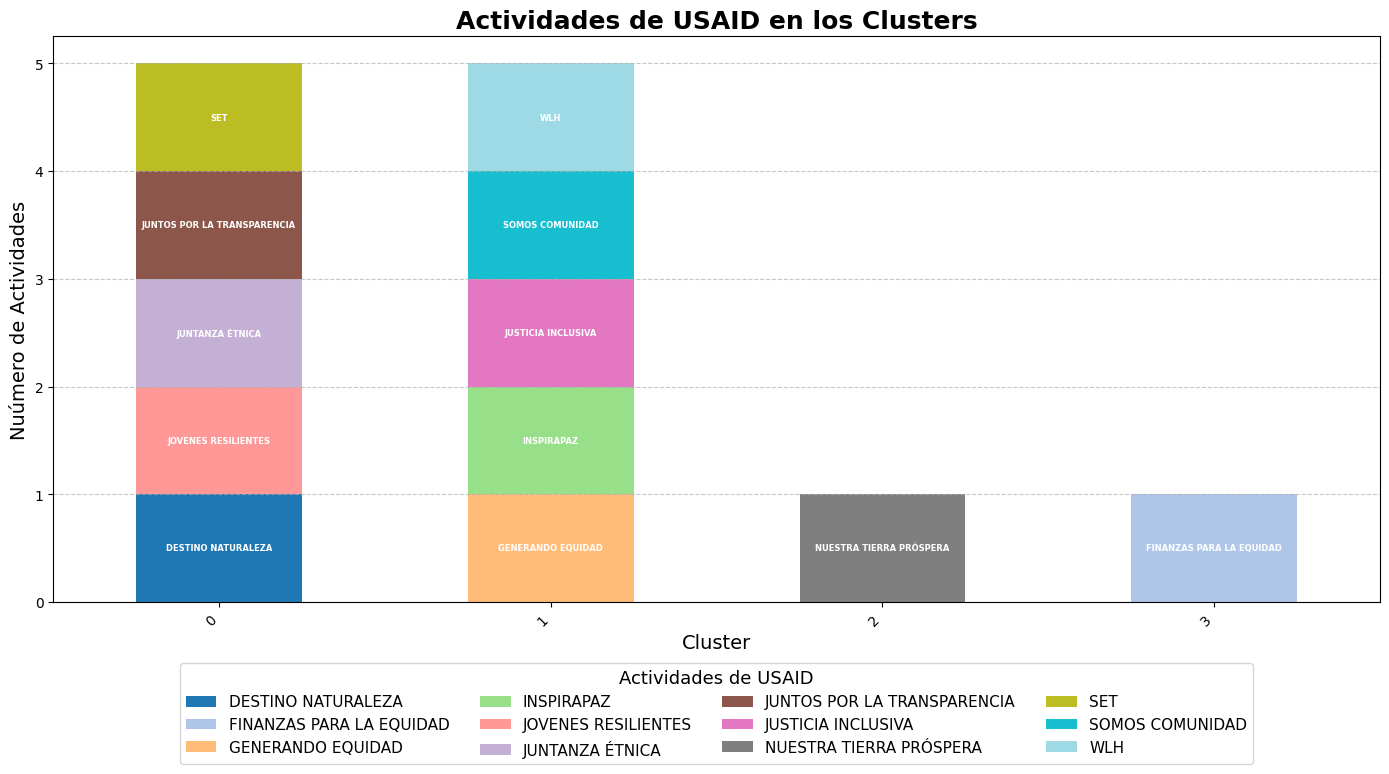

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'organizations' is the dataframe with original features
# and 'clusters' is the array with cluster labels
df['Cluster'] = clusters

# Group by a specific categorical feature and the cluster labels
grouped = df.groupby(['Cluster', 'ACTIVIDADES_USAID']).size().unstack()

# Plot the grouped data
plt.figure(figsize=(10, 7))

# Plot with a specified color map
ax = grouped.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))  # Try colormaps like 'Set1', 'Pastel1', 'tab20', etc.

# Add title and labels with enhanced font size
plt.title("Actividades de USAID en los Clusters", fontsize=18, weight='bold')
plt.ylabel("Nuúmero de Actividades", fontsize=14)
plt.xlabel("Cluster", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels (legend text) inside each bar
for container in ax.containers:
    # Get the label associated with the container
    label = container.get_label()
    for i, rect in enumerate(container):
        height = rect.get_height()
        if height > 0:  # To avoid placing labels in empty bars
            ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2,
                    label, ha='center', va='center', fontsize=6, weight='bold', color='white')

# Customize legend and move it to the top of the plot
plt.legend(title='Actividades de USAID', title_fontsize='13', fontsize='11', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

# Adjust gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

CLUSTERS DESCRIPTION

#Fortalecimiento comunitario y de la gobernabilidad para la seguridad ciudadana, la convivencia y la prestación de servicios.#

Problemas que se intervienen:

- Violación de los derechos humanos de las comunidades
- La débil presencia, acción y eficacia del Estado
- El recrudecimiento del conflicto armado y de sus consecuencias y efectos dañinos sobre la población civil
- Gobernabilidad elitista y centralista, con débil participación de las comunidades.

Actividades de USAID: Justicia Inclusiva, Somos Comunidad, Juntos por la Transparencia, Jóvenes Resilientes, Inspirapaz, Generando Equidad.

Municipios prioritarios: Guapi, El Tambo, Santander de Quilichao, Caldono, Caloto, Corinto, Jambaló, Miranda.

Ejes temáticos: Juntanza para la Vida. Personas empoderadas para recuperarse de la violencia, Capacidad comunitaria mejorada para prevenir la violencia, Gobernabilidad mejorada para la seguridad ciudadana, Presencia estatal
expandida y sistemas para la entrega de servicios estatales más sensibles a las comunidades, Mayor participación ciudadana en procesos gubernamentales. Prevención del reclutamiento, seguridad ciudadana y convivencia.

Potencialidades en las que apoyarse

- La población y su diversidad étnica y cultural
- La fortaleza de las organizaciones étnicas, sociales y culturales

Proyectos en ejecución de la Misión Cauca

- Adecuación de centros educativos en El Tambo
- Construcción de puestos de salud
- Escuelas musicales en Guapi, Timbiquí y

#Fortalecimiento de los medios de subsistencia y de las economías lícitas y sostenibles para la resiliencia y la prevención de la violencia#

Problemas que se intervienen

- Pobreza e inequidad social y económica
- La débil presencia, acción y eficacia del Estado  

Actividades de USAID: Destino Naturaleza, SET, Juntanza Étnica, WLH.

Municipios: Guapi, Santander de Quilichao, Buenos Aires, Cajibío, Morales, Suarez, Timbiquí.

Ejes temáticos: Oportunidades para Soñar, Cauca Productivo y Sostenible, Buen Gobierno, Juntanza para la Vida. Personas empoderadas para recuperarse de la violencia, Capacidad comunitaria mejorada para prevenir la violencia, Oportunidades ampliadas de medios de subsistencia lícitos, Economías lícitas más competitivas. Desarrollo productivo, medio ambiente, prevención del reclutamiento, seguridad ciudadana y convivencia.

Potencialidades en las que apoyarse

- La posición geoestratégica y los recursos naturales y paisajísticos del departamento
- Los Acuerdos de Paz
- El sector productivo y agropecuario del departamento

Proyectos en ejecución de la Misión Cauca:

- Sustitución de cultivos de uso ilícito en Norte del Cauca y Cañon del Micay con frijol y café para 5000 beneficiarios.
- Huertas escolares
- Cacao y coco en el Pacífico caucano
- Construcción de plaza de mercado El Plateado
- Mejoramiento de vías
- Turismo en Guapi La Ruta del Biche
- Cadena de frío para la pesca artesanal en Guapi
- Grupos Colibrí de la Policía. Sustitución
- Gestores de café del Ejército de Colombia


#Desarrollo económico lícito y sostenible#

Problemas que se intervienen

- Pobreza e inequidad social y económica
- La débil presencia, acción y eficacia del Estado
- Poco crecimiento y competitividad de la economía del departamento

Actividades de USAID: Nuestra Tierra Próspera y Finanzas para la Equidad

Municipios: Guapi, *Argelia*, *El Tambo*, *Lopez de Micay*, Santander de Quilichao, *Balboa*, Buenos Aires, Cajibío, *Caldono*, *Caloto*, *Corinto*, *Jambaló*, *Mercaderes*, *Miranda*, Morales, *Patía*, *Piendamó*, *Toribío*, *Guachené*, *Padilla*, *Villarrica*, *Popayán*.

Ejes temáticos: Cauca Productivo y Sostenible, Competitividad. Oportunidades
ampliadas de medios de subsistencia lícitos, Economías lícitas más competitivas. Economías ilícitas, desarrollo productivo, transición energética, prevención del reclutamiento.

Potencialidades en las que apoyarse

- La posición geoestratégica y los recursos naturales y paisajísticos del departamento
- Los Acuerdos de Paz
- El sector productivo y agropecuario del departamento

Proyectos en ejecución de la Misión Cauca:

- Sustitución de cultivos de uso ilícito en Norte del Cauca y Cañon del Micay con frijol y café para 5000 beneficiarios.
- Huertas escolares
- Cacao y coco en el Pacífico caucano
- Mejoramiento de vías
- Turismo en Guapi La Ruta del Biche
- Cadena de frío para la pesca artesanal en Guapi
- Grupos Colibrí de la Policía. Sustitución
- Gestores de café del Ejército de Colombia

